In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('dataport.xlsx')
data2 = pd.read_excel('all-cars.xls')

**Data cleaning**

In [3]:
data

,importateur,jan,fev,mars,avr,mai,juin,juillet,out,sept,oct,nov,dec,nbmarque,nbagenceoff,origine,type
0,ADEV SARL,190,22,285,484,238,19,335,189,240,73,227,45,1,1,asiatique,S
1,AFRIQUE AUTO,385,481,601,491,220,398,488,602,933,214,451,156,2,1,american,S
2,ALPHA FORD,206,271,625,569,1057,980,1187,276,677,905,566,191,1,2,american,S
3,ALPHA HYUNDAI MOTOR,25,22,431,284,400,646,494,540,478,1064,425,73,1,4,asiatique,S
4,ALPHA INTER,23,22,25,28,25,29,68,41,13,14,58,16,2,2,european,S
5,ARTES,876,1223,4267,2361,2716,1676,1288,1548,865,852,736,464,2,2,european,B
6,AURES AUTO CITROENE,530,1306,1770,1327,2261,2090,2329,1083,1209,1126,650,527,2,6,european,B
7,BSB,283,54,131,344,714,972,522,794,698,643,673,205,1,7,asiatique,S
8,CITY CARS,35,1054,1653,835,613,379,1256,737,693,642,572,850,1,12,asiatique,S
9,ECONOMIC AUTO,279,137,48,196,157,150,527,399,399,307,295,261,1,8,asiatique,S


In [54]:
data2

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,0,229,1,0,0,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,0,293,2,0,1,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,0,366,2,0,1,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,0,365,2,0,1,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,0,0,2,0,1,43755,39014,3.5,6.0,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,37,83,2,1,1,40565,38203,2.4,5.0,197,21,28,3450,105,186
424,37,82,2,1,1,42565,40083,2.3,5.0,242,20,26,3450,105,186
425,37,322,2,1,1,45210,42573,2.9,6.0,268,19,26,3653,110,190
426,37,389,5,1,1,26135,24641,1.9,4.0,170,22,29,2822,101,180


In [5]:
data2.head(3)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183


In [6]:
data2.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [7]:
data2['Type'].unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [8]:
data2['Origin'].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [9]:
data2.nunique()

Make            38
Model          425
Type             6
Origin           3
DriveTrain       3
MSRP           410
Invoice        425
EngineSize      43
Cylinders        7
Horsepower     110
MPG_City        28
MPG_Highway     33
Weight         348
Wheelbase       40
Length          67
dtype: int64

In [10]:
categorical_feature_mask = data2.dtypes==object

In [11]:
categorical_feature_mask

Make            True
Model           True
Type            True
Origin          True
DriveTrain      True
MSRP           False
Invoice        False
EngineSize     False
Cylinders      False
Horsepower     False
MPG_City       False
MPG_Highway    False
Weight         False
Wheelbase      False
Length         False
dtype: bool

In [12]:
categorical_cols = data2.columns[categorical_feature_mask].tolist()

In [13]:
categorical_cols

['Make', 'Model', 'Type', 'Origin', 'DriveTrain']

In [14]:
LE =LabelEncoder()

In [15]:
data2[categorical_cols] = data2[categorical_cols].apply(lambda col: LE.fit_transform(col))

In [16]:
pd.isnull(data2).sum() > 0


Make           False
Model          False
Type           False
Origin         False
DriveTrain     False
MSRP           False
Invoice        False
EngineSize     False
Cylinders       True
Horsepower     False
MPG_City       False
MPG_Highway    False
Weight         False
Wheelbase      False
Length         False
dtype: bool

In [17]:
data2['Cylinders'] = data2['Cylinders'].fillna(data2['Cylinders'].mean())

In [18]:
Y = data2['Origin']
X = data2.drop('Origin',axis = 1)

In [19]:
X_train, X_test, y_train, y_test =train_test_split(X, Y,test_size=0.3, random_state=2)

**Feature engineering**

In [20]:
from sklearn.model_selection import GridSearchCV

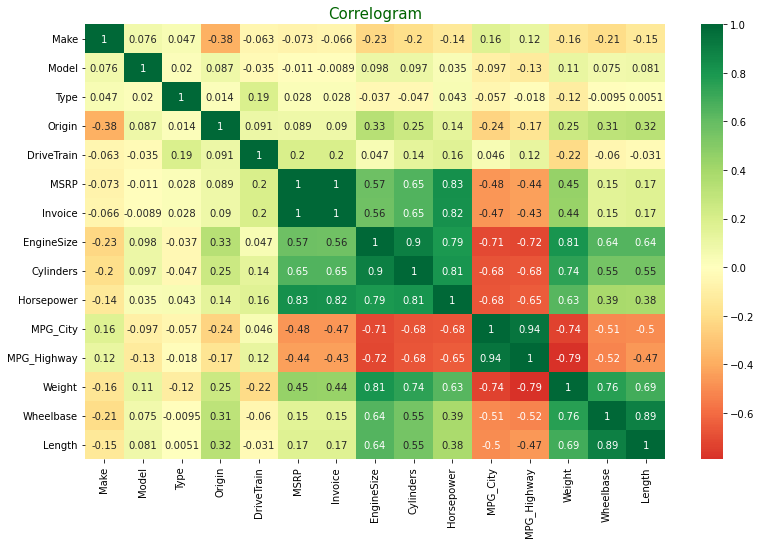

In [46]:
# Quantify correlations
corr = data2.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

**lgbm model**

In [22]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Making predictions
y_pred = lgb_model.predict(X_test)

# Measuring the accuracy of the model
def evaluate_model(test,predictions):
    print(f'Accuracy score: {accuracy_score(test, predictions)}')
    print('\n')
    print(f'{classification_report(test, predictions)}')

In [23]:
evaluate_model(y_test,y_pred)

Accuracy score: 0.9534883720930233


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.95      0.95      0.95        42
           2       0.97      0.97      0.97        35

    accuracy                           0.95       129
   macro avg       0.96      0.96      0.96       129
weighted avg       0.95      0.95      0.95       129



In [24]:
y_pred

array([1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2,
       0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2,
       1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0,
       0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1])

**KNN algo**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn =  KNeighborsClassifier(n_neighbors=11)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [50]:
y_predKnn= knn.predict(X_test)

In [51]:
y_predKnn

array([1, 2, 1, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2,
       2, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1,
       0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0,
       1, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [52]:
evaluate_model(y_test,y_predKnn)

Accuracy score: 0.5193798449612403


              precision    recall  f1-score   support

           0       0.55      0.54      0.54        52
           1       0.63      0.64      0.64        42
           2       0.34      0.34      0.34        35

    accuracy                           0.52       129
   macro avg       0.51      0.51      0.51       129
weighted avg       0.52      0.52      0.52       129



In [109]:
print(grid_search.best_params_)

{'n_neighbors': 11}


In [53]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


**XGBC model**

In [41]:
from xgboost import XGBClassifier

In [42]:
xgbc = XGBClassifier()

In [43]:
xgbc.fit(X_train,y_train)

C:\Users\jihed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [44]:
y_predXGBC = xgbc.predict(X_test)

In [45]:
evaluate_model(y_test,y_predXGBC)

Accuracy score: 0.9534883720930233


              precision    recall  f1-score   support

           0       0.93      0.96      0.94        52
           1       0.95      0.95      0.95        42
           2       1.00      0.94      0.97        35

    accuracy                           0.95       129
   macro avg       0.96      0.95      0.96       129
weighted avg       0.95      0.95      0.95       129

